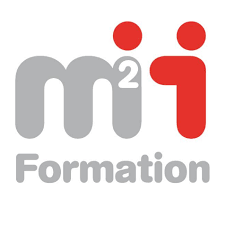

# Aggrégations basiques

A l'opposé de la recherche, les analytiques permettent d'avoir l'image globale des données.
Les éléments d'aggrégations aggs permettent d'aggréger les données, elles ont la forme:

```
POST /<index_name>/_search {
  "aggs": {
      ... type of aggregation ...          
  },  
  "query": {
      ... type of query ... 
  },
  //optional query part size":0                                         
  //size typically set to 0
}              
```

**Aggrégations Bucket**

Les aggrégations bucket segmentent les données (query) en plusieurs buckets qui sont identifiés pas une clé. Les aggrégations buckets évaluent chaque document dans le contexte en décidant le bucket auquel il appartient. Au final, un bucket contient un ensemble de documents et il est identifié par une clé.
Les aggrégations bucket sont équivalents aux requêtes GROUP BY de SQL.

**Aggrégations Métrique**

Les aggrégations métrique s'appliquent sur les champs numériques, ils calculent la valeur aggrégée du champs dans un contexte donné. Une aggrégation métrique peut calculer la somme, la moyenne, le minimum, le maximum...

**Aggrégations Matricielles**

Les aggrégations matricielles ont été introduites à partir de la version 5.0. Elles sont appliquées sur plusieurs champs et calculent les matrices à travers tous les documents dans un contexte déterminé.

Les aggrégations matricielles peuvent être imbriquées dans les aggrégations bucket mais pas l'inverse.

**Aggrégations Pipeline**

Les aggrégations pipeline sont des aggrégations d'ordre supérieur et peuvent aggréger la sortie d'autre aggrégations. Elles peuvent être utilisées pour calculer par exemple les dérivées.

# Préparation des données

**Chargement de données avec Logstash**

1. Télécharger la version https://www.elastic.co/fr/downloads/logstash
2. Extraire logstash
3. Copier les fichiers network_traffic_data.zip et logstash_network_traffic_data.conf dans le répertoire files de logstash
4. Décompresser  network_traffic_data.zip pour avoir network_traffic_data.json dans le répertoire files
5. Mettre à jour logstash_network_traffic_data.conf en spécifiant le chemin du fichier JSON
6. Créer l'indexe suivantes:
```
PUT /bigginsight
{
  "settings": {
    "index": {
      "number_of_replicas": "1",
      "number_of_shards": "5"
    }
  },
  "mappings": {
    "properties": {
      "accessPointId": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "application": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "band": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "bandwidth": {
        "type": "double"
      },
      "category": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "customer": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "department": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "downloadCurrent": {
        "type": "double"
      },
      "downloadTotal": {
        "type": "integer"
      },
      "inactiveMs": {
        "type": "integer"
      },
      "location": {
        "type": "geo_point"
      },
      "mac": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "networkId": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      },
      "signalStrength": {
        "type": "integer"
      },
      "time": {
        "type": "date",
        "format": "strict_date_optional_time||epoch_millis"
      },
      "uploadCurrent": {
        "type": "double"
      },
      "uploadTotal": {
        "type": "integer"
      },
      "usage": {
        "type": "double"
      },
      "username": {
        "type": "keyword",
        "fields": {
          "analyzed": {
            "type": "text"
          }
        }
      }
    }
  }
}
```

7. Démarrer logstash avec la commande suivante:

```
bin\logstash -f files\logstash_network_traffic_data.conf
```

8. Vérifier les données avec la commande suivante que le nombre total de documents est de 242835, (utiliser le paramètre  track_total_hits=true pour afficher la valeur réelle.

```
GET /bigginsight/_search
{
  "query": {
    "match_all": {}
   },
  "size": 1
}
```

# Aggrégations Métriques

Les aggrégations métriques sont appliquées sur les données numériques et permettent de calculer l'une des métriques dans un contexte déterminé, le contexte peut être une requête, un filtre ou aucune requête pour inclure toute l'indexe/type. Elles peuvent également être imbriquées dans les aggrégations bucket pour qu'elles soient calculées pour chaque bucket. 

**min,max,sum,avg**

```
GET bigginsight/_search
{
 "aggregations": {                     
    "download_sum": {                  
      "sum": {                         
        "field": "downloadTotal"       
      }      
    }
  },
  "size": 0                            
}
```

```
GET bigginsight/_search
{
 "aggregations": {                     
    "download_average": {                
      "avg": {                           
        "field": "downloadTotal"       
      }      
    }
  },
  "size": 0                            
}
```

```
GET bigginsight/_search
{
 "aggregations": {                    
    "download_min": {                  
      "min": {                         
        "field": "downloadTotal"       
      }      
    }
  },
  "size": 0                            
}
```

```
GET bigginsight/_search
{
 "aggregations": {                    
    "download_max": {                  
      "max": {                         
        "field": "downloadTotal"       
      }      
    }
  },
  "size": 0                            
}
```

**Statistiques**

```
GET bigginsight/_search
{
 "aggregations": {
    "download_stats": {
      "stats": {
        "field": "downloadTotal"
      }
    }
  },
  "size": 0
}
```

```
GET bigginsight/_search
{
 "aggregations": {
    "download_estats": {
      "extended_stats": {
        "field": "downloadTotal"
      }
    }
  },
  "size": 0
}
```

**Cardinalité**

Les aggrégations cardinalité permettent de retrouver le compte des valeurs uniques pour un certain champ.

NB:

Pour afficher le mapping des champs:

```
GET /bigginsight/_mapping
```

A partir de la version 7.10, pour les champs text, il faut mettre fielddata à true pour pouvoir analyser ces champs:

```
PUT /bigginsight/_mapping
{
  "properties": {
    "username": {
      "type": "text",
      "fielddata": true
    }
  }
}
```

```
GET bigginsight/_search
{
 "aggregations": {
    "unique_visitors": {
      "cardinality": {
        "field": "username"
      }
    }
  },
  "size": 0
}
```

# Aggrégations Buckets

Les aggrégations bucket permettent de segmenter les données en petites parties.

**Termes**

```
GET /bigginsight/_search
{
  "aggs": {                           
    "byCategory": {                   
      "terms": {                      
        "field": "category"           
      }
    }
  },
  "size": 0                           
}
```

Pour filtrer les valeurs avant de regrouper, on peut utiliser la requête suivante:

```
GET /bigginsight/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "terms": {
          "category.keyword": [
            "Chat",
            "Blogging"
          ]
        }
      },
      "boost": 1.2
    }
  },
  "aggs": {
    "byCategory": {
      "terms": {
        "field": "category.keyword"
      }
    }
  }
}
```

```
GET /bigginsight/_search?size=0
{
  "aggs": {
    "byApplication": {
      "terms": {
        "field": "application"
      }
    }
  }
}
```

```
GET /bigginsight/_search?size=0
{
  "aggs": {
    "byApplication": {
      "terms": {
        "field": "application",
        "size": 15
      }
    }
  }
}
```

**Numérique**

```
POST /bigginsight/_search?size=0
{
  "aggs": {
    "by_usage": {
      "histogram": {
        "field": "usage",
        "interval": 1000
      }
    }
  }
}
```

```
POST /bigginsight/_search?size=0
{
  "aggs": {
    "by_usage": {
      "range": {
        "field": "usage",
        "ranges": [
          { "to": 1024 },
          { "from": 1024, "to": 102400 },
          { "from": 102400 }
        ]
      }
    }
  }
}
```

```
POST /bigginsight/_search?size=0
{
  "aggs": {
    "by_usage": {
      "range": {
        "field": "usage",
        "ranges": [
          { "key": "Upto 1 kb", "to": 1024 },
          { "key": "1 kb to 100 kb","from": 1024, "to": 102400 },
          { "key": "100 kb and more", "from": 102400 }
        ]
      }
    }
  }
}
```

**Aggrégations sur les données filtrées**

```
GET /bigginsight/_search?size=0
{
  "query": {
    "term": {
      "customer": "Linkedin"
    }
  }, 
  "aggs": {                           
    "byCategory": {                   
      "terms": {                      
        "field": "category"           
      }
    }
  }
}
```

```
GET /bigginsight/_search?size=0
{
  "query": {
    "bool": {
      "must": [
        {"term": {"customer": "Linkedin"}}, 
        {"range": {"time": {"gte": 1506277800000, "lte": 1506294200000}}}
      ]
    }
  },
  "aggs": {
    "byCategory": {
      "terms": {
        "field": "category"
      }
    }
  }
}
```

**Imbriquer des aggrégations**

```
GET /bigginsight/_search?size=0
{
  "query": {                                      
    "bool": {
      "must": [
        {"term": {"customer": "Linkedin"}}, 
        {"range": {"time": {"gte": 1506257800000, "lte": 1506314200000}}}
      ]
    }
  },
  "aggs": {
    "by_users": {                                 
      "terms": {
        "field": "username"
      },
      "aggs": {
        "total_usage": {                          
          "sum": { "field": "usage" }
        }
      }
    }
  }
}
```

On peut également trier selon un groupe:

```
GET /bigginsight/_search?size=0
{
  "query": {                                                  
    "bool": {
      "must": [
        {"term": {"customer.keyword": "Linkedin"}}, 
        {"range": {"time": {"gte": 1506257800000, "lte": 1506314200000}}}
      ]
    }
  },
  "aggs": {
    "by_departments": {                                       
      "terms": { "field": "department.keyword" },               
      "aggs": {
        "by_users": {                                         
          "terms": {
            "field": "username.keyword",
            "size": 2,                                        
            "order": { "total_usage": "desc"}
          },
          "aggs": {
            "total_usage": {"sum": { "field": "usage" }}      
          }
        }
      }
    }
  }
}
```

**Filtrer une aggrégation**

```
POST /bigginsight/_search?size=0
{
  "aggs": {
    "chat": {
      "filter": {
        "term": {
          "category": "Chat"
        }
      }
    }
  }
}
```

On peut également utiliser plusieurs filtres:

```
GET bigginsight/_search?size=0
{
  "aggs": {
    "messages": {
      "filters": {
        "filters": {
          "chat": { "match": { "category": "Chat" }},              
          "skype": { "match": { "application": "Skype" }},         
          "other_than_skype": {                                    
            "bool": {
              "must": {"match": {"category": "Chat"}},
              "must_not": {"match": {"application": "Skype"}}
            }
          }
        }
      }
    }
  }
}
```


**Date/Time**

Les aggrégations histogramme de date permettent de créer des buckets pour un champs date.

```
GET /bigginsight/_search?size=0       
{
  "aggs": {
    "counts_over_time": {
      "date_histogram": {                         
        "field": "time",
        "interval": "1d"                          
      }
    }
  }
}
```

On peut préciser le fuseau horaire "time zone":

```
GET /bigginsight/_search?size=0
{
  "aggs": {
    "counts_over_time": {
      "date_histogram": {
        "field": "time",
        "interval": "1d",
        "time_zone": "+05:30"
      }
    }
  }
}
```

On peut afficher les données par intervalles de temps:

```
GET /bigginsight/_search?size=0
{
  "query": { "term": {"customer": "Linkedin"} },
  "aggs": {
    "counts_over_time": {
      "date_histogram": {
        "field": "time",
        "interval": "1d",
        "time_zone": "+05:30"
      },
      "aggs": {
        "total_bandwidth": {
          "sum": { "field": "usage" }
        }
      }
    }
  }
}
```

On peut faire des aggrégations par heure:

```
GET /bigginsight/_search?size=0
{
  "query": {
    "bool": {
      "must": [
        {"term": {"customer": "Linkedin"}}, 
        {"range": {"time": {"gte": 1506277800000}}}
      ]
    }
  },
  "aggs": {
    "counts_over_time": {
      "date_histogram": {
        "field": "time",
        "interval": "1h",
        "time_zone": "+05:30"
      },
      "aggs": {
        "hourly_usage": {
          "sum": { "field": "usage" }
        }
      }
    }
  }
}
```

**Géolocalisation**

On peut utiliser les coordonnées géospatiales pour créer des buckets en spécifiant une distance depuis l'origine.

```
GET bigginsight/_search?size=0
{
  "aggs": {
    "within_radius": {
      "geo_distance": {
        "field": "location",
        "origin": {"lat": 23.102869,"lon": 72.595692},
        "ranges": [{"to": 5}]
      }
    }
  }
}
```

ou en spécifiant un intervalle:

```
GET bigginsight/_search?size=0
{
  "aggs": {
    "within_radius": {
      "geo_distance": {
        "field": "location",
        "origin": {"lat": 23.102869,"lon": 72.595692},
        "ranges": [{"from": 5, "to": 10}]
      }
    }
  }
}
```

On peut également utiliser les geohash qui sont sous forme rectangulaire pour aggréger les données selon la zone géographique:

```
GET bigginsight/_search?size=0
{
  "aggs": {
    "geo_hash": {
      "geohash_grid": {
        "field": "location",
        "precision": 7
      }
    }
  }
}
```



# Pipeline

Les aggrégations pipeline permettent d'aggréger le résultat d'une autre aggrégation.

```
GET /bigginsight/_search?size=0
{
  "query": {
    "bool": {
      "must": [
        {"term": {"customer": "Linkedin"}}, 
        {"range": {"time": {"gte": 1506277800000}}}
      ]
    }
  },
  "aggs": {
    "counts_over_time": {
      "date_histogram": {
        "field": "time",
        "interval": "1h",
        "time_zone": "+05:30"
      },
      "aggs": {
        "hourly_usage": {
          "sum": { "field": "usage" }
        },
        "cumulative_hourly_usage": {         
          "cumulative_sum": {                 
              "buckets_path": "hourly_usage"   
          }
        }
      }
    }
  }
}
```